## Lec 2. 线性神经网络 Linear Neural Network

- 线性回归 `Linear Regression`
- 线性神经网络 `Linear Neural Network` -> 多层感知机 `MLP`
    - 模型 Model: f(x) = x @ weight + bias -> y_hat
        - nn.Module
        - Activation 激活函数: tahn, sigmoid, relu, ......
    - 数据集 Dataset: x(features), y_ture
    - 损失函数 Loss Function: MSE, CrossEntropyLoss, ......
    - 优化器 Optimizer: Adam, SGD, ......
- 神经网络的训练流程
    - 构建训练所需要的所有组件: 模型, 数据集, 损失函数, 优化器
    - 前向传播: 将数据集中的 `features` 投入模型之中, 计算出预测值 `y_hat`
    - 反向传播: 通过损失函数 `loss_func` 计算预测值 `y_hat`与实际值 `y_true` 之间的差异, 并且反向链式求导计算梯度
    - 调整模型参数: 通过优化器 `optimizer` 调整模型参数
 
### 2.1 简单的神经网络训练流程

In [1]:
import torch
import torch.nn as nn

In [2]:
# 0. 构建模拟数据集
x = torch.rand(16, 5)  # 数据集中的特征数据
y_true = torch.rand(16, 10)  # 数据集的真实结果

x.shape, y_true.shape

(torch.Size([16, 5]), torch.Size([16, 10]))

In [3]:
# 1. 创建训练模型所需要的所有组件
loss_func = nn.MSELoss() # 定义损失函数
net = nn.Linear(5, 10) # 定义简单的线性神经网络模型 net / full-connection
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)  # 构建一个优化器的实例对象, learning rate 学习率

net

Linear(in_features=5, out_features=10, bias=True)

In [4]:
type(net)

torch.nn.modules.linear.Linear

In [5]:
net.weight

Parameter containing:
tensor([[ 0.0738,  0.4266, -0.1658,  0.3947, -0.0689],
        [-0.0538, -0.4006,  0.2922, -0.1405, -0.2711],
        [ 0.2006,  0.0140, -0.1302,  0.3517, -0.1576],
        [-0.1914, -0.4452, -0.1307,  0.3154,  0.1927],
        [-0.1000, -0.0619, -0.3254,  0.1241, -0.1636],
        [ 0.0851, -0.2980,  0.3102,  0.1490,  0.0890],
        [ 0.4096,  0.0948, -0.2078, -0.0991, -0.1285],
        [-0.3150, -0.0424, -0.2263, -0.2928, -0.3212],
        [ 0.0613, -0.3653, -0.3518, -0.2550, -0.3309],
        [-0.1167, -0.4104, -0.1118,  0.1361, -0.2952]], requires_grad=True)

In [6]:
net.bias

Parameter containing:
tensor([ 0.2788, -0.1838, -0.2571,  0.1715, -0.2176,  0.1837,  0.3104,  0.1337,
        -0.1251, -0.4290], requires_grad=True)

In [7]:
# 2. 前向传播
y_hat = net(x)  # 模型预测的结果
y_hat.shape

torch.Size([16, 10])

In [8]:
# 3. 反向传播
loss = loss_func(y_hat, y_true)  # 计算出包含梯度的损失值
loss

tensor(0.8208, grad_fn=<MseLossBackward0>)

In [9]:
loss.backward() # 反向传播链式求导, 对模型中的所有参数parameters标记梯度

In [10]:
net.bias

Parameter containing:
tensor([ 0.2788, -0.1838, -0.2571,  0.1715, -0.2176,  0.1837,  0.3104,  0.1337,
        -0.1251, -0.4290], requires_grad=True)

In [11]:
optimizer.step()

In [12]:
net.bias

Parameter containing:
tensor([ 0.2787, -0.1837, -0.2570,  0.1716, -0.2175,  0.1838,  0.3105,  0.1338,
        -0.1250, -0.4289], requires_grad=True)

### 2.2 线性神经网络实现`逻辑回归`

- 逻辑回归 Logistics Regression: 分类模型
- 模型输出分类概率值 -> 分类标签

In [13]:
import torch
import torch.nn as nn

import torch.nn.functional as F

In [14]:
# 0. 构建模拟数据集
x = torch.Tensor([[1.5, ],  # 身高
                  [1.46, ],
                  [1.55, ],
                  [1.6, ], 
                  [1.8, ],
                  [1.96, ],
                  [1.78, ]])

y_true = torch.Tensor([[0], 
                       [0], 
                       [0], 
                       [0], 
                       [1], 
                       [1], 
                       [1]])  # 二分类问题的类别标签 [0, 1] (Female / Male)

x.shape, y_true.shape

(torch.Size([7, 1]), torch.Size([7, 1]))

In [15]:
# 1. 构建模型
class LogisticRegression(nn.Module):
    """ 基于线性神经网络的逻辑回归模型 """
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        """ 前向传播方法 """
        output = self.fc(x)
        output = F.sigmoid(output)
        return output

In [16]:
# 2. 构建损失函数和优化器
model = LogisticRegression()

loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [17]:
# 3. 训练模型
epoch = 50000
train_loss = []

for i in range(epoch):
    # 前向传播
    y_hat = model(x)
    loss = loss_func(y_hat, y_true)

    optimizer.zero_grad()  # 清空之前步骤产生的梯度
    loss.backward()  # 计算新的梯度
    optimizer.step()  # 更新参数

    train_loss.append(loss.item())

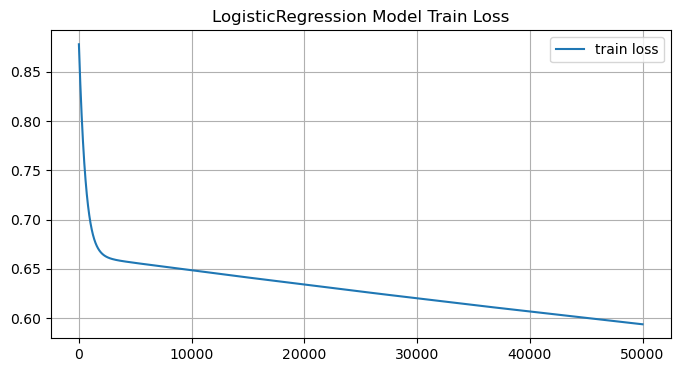

In [18]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'

plt.figure(figsize=(8, 4))
plt.plot(train_loss, label="train loss")
plt.title("LogisticRegression Model Train Loss")
plt.legend()

plt.grid()
plt.show()

In [19]:
# 4. 验证模型效果
import numpy as np

x_t = torch.Tensor([[1.1], 
                    [1.75],
                    [1.82], 
                    [1.95]])
x_t.shape

torch.Size([4, 1])

In [20]:
y_t = model(x_t)
y_t

tensor([[0.2966],
        [0.4852],
        [0.5069],
        [0.5470]], grad_fn=<SigmoidBackward0>)

In [21]:
y_t > 0.5

tensor([[False],
        [False],
        [ True],
        [ True]])

### 2.3 `Fasion-MNIST` 图像识别任务 工程化实现

- 替代MNIST手写数字集的图像数据集, 其涵盖了来自 10 种类别的共 7 万个不同商品的正面图片
- 60000/10000 的训练测试数据划分，28x28 的灰度图片
    - Train set: 从原始数据集中，随机抽样一部分数据用于模型训练的部分
    - Test set: 剩下的一部分用于验证模型效果的部分
- CSV 逗号分隔符文件, 常见的结构型数据存储格式

In [27]:
import pandas as pd

# 初步探索数据集构成
df_dataset = pd.read_csv("E:/文件/fashion-mnist_test.csv")  # 使用相对路径读取CSV文件, 得到DataFrame 数据帧
df_dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
# 1. 构建数据集
train_set = df_dataset.sample(frac=0.7)
test_set = df_dataset[~df_dataset.index.isin(train_set.index)]

train_set.shape, test_set.shape

((7000, 785), (3000, 785))

In [29]:
from torch.utils.data import Dataset, DataLoader

class FasionMNIST(Dataset):
    """ FasionMNIST图像识别数据集 """
    def __init__(self, df_dataset):
        self.y = df_dataset.label.values
        self.x = df_dataset.iloc[:, 1:].values

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y = torch.LongTensor([self.y[idx]])
        x = torch.Tensor(self.x[idx])
        return y, x

In [30]:
train_dataset = FasionMNIST(train_set)
test_dataset = FasionMNIST(test_set)

len(train_dataset), len(test_dataset)

(7000, 3000)

In [31]:
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256)

len(train_dataloader), len(test_dataloader)

(28, 12)

In [32]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [33]:
# 2. 构建模型 784 -> 512 -> 256 -> 10
model = nn.Sequential(nn.Linear(784, 512), 
                      nn.ReLU(), 
                      
                      nn.Linear(512, 256), 
                      nn.ReLU(), 
                      
                      nn.Linear(256, 10), 
                      nn.Softmax())

model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
  (5): Softmax(dim=None)
)

In [34]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [35]:
# 3. 训练模型
def train_model(model, train_dataloader, optimizer, loss_func):
    """ 训练模型 """
    total_loss = 0.

    model.train() # 打开模型训练模式, 所有参数可以被调整
    for (y, x) in train_dataloader:
        y_hat = model(x.to(device))
        loss = loss_func(y_hat, y.to(device).view(y.shape[0]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    print(f"Total loss: {total_loss/len(train_dataloader): 0.4f}")
    return total_loss/len(train_dataloader)

In [36]:
# 4. 验证模型
def test_model(model, test_dataloader, loss_func):
    """ 训练模型 """
    total_loss = 0.

    model.eval() # 打开模型验证模式，所有参数冻结不可被调整
    for (y, x) in test_dataloader:
        y_hat = model(x.to(device))
        loss = loss_func(y_hat, y.to(device).view(y.shape[0]))
        
        total_loss += loss.item()
    print(f"Total loss: {total_loss/len(test_dataloader): 0.4f}")
    return total_loss/len(test_dataloader)

In [37]:
epoch = 100

train_loss_records = []
test_loss_records = []

for i in range(epoch):
    train_loss = train_model(model, train_dataloader, optimizer, loss_func)
    test_loss = test_model(model, test_dataloader, loss_func)
    
    train_loss_records.append(train_loss)
    test_loss_records.append(test_loss)

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Total loss:  2.0717
Total loss:  1.9550
Total loss:  1.9430
Total loss:  1.9444
Total loss:  1.9357
Total loss:  1.9372
Total loss:  1.9216
Total loss:  1.9390
Total loss:  1.9291
Total loss:  1.9397
Total loss:  1.9215
Total loss:  1.9296
Total loss:  1.9128
Total loss:  1.9283
Total loss:  1.9125
Total loss:  1.9367
Total loss:  1.9222
Total loss:  1.9343
Total loss:  1.9200
Total loss:  1.9344
Total loss:  1.9179
Total loss:  1.9334
Total loss:  1.9120
Total loss:  1.9307
Total loss:  1.9025
Total loss:  1.9279
Total loss:  1.9039
Total loss:  1.9277
Total loss:  1.8987
Total loss:  1.9221
Total loss:  1.8967
Total loss:  1.9240
Total loss:  1.8720
Total loss:  1.8681
Total loss:  1.8598
Total loss:  1.8644
Total loss:  1.8467
Total loss:  1.8326
Total loss:  1.7804
Total loss:  1.7972
Total loss:  1.7554
Total loss:  1.8014
Total loss:  1.7494
Total loss:  1.7720
Total loss:  1.7408
Total loss:  1.8006
Total loss:  1.7441
Total loss:  1.7935
Total loss:  1.7349
Total loss:  1.7883


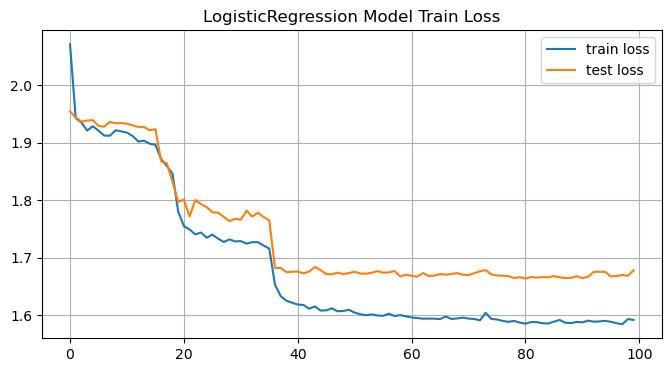

In [38]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'

plt.figure(figsize=(8, 4))
plt.plot(train_loss_records, label="train loss")
plt.plot(test_loss_records, label="test loss")
plt.title("LogisticRegression Model Train Loss")
plt.legend()

plt.grid()
plt.show()